In [1]:
# group 23 : ajay walke, yogesh ghodmare, abhishek raj, shyam kumar

# importing the required libraries

import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, datasets, models
from tensorflow.keras.models import Sequential
import warnings
warnings.filterwarnings('ignore')



In [2]:
# loading the dataset and splilting them to training and testing 

(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0
print("train images size : ", train_images.shape)
print("test images size : ", test_images.shape)

train images size :  (60000, 28, 28, 1)
test images size :  (10000, 28, 28, 1)


In [3]:
# using the CNN for predicting digit 
# imported the sequential model for finding the digit

num_classes = 10
img_height = 28
img_width = 28

model = Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

In [4]:


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        18464     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 6, 6, 64)          9

In [6]:
# creating the epochs for creating the best results for model

epochs = 10
history = model.fit(
  train_images, 
  train_labels,
  epochs = epochs
)

Epoch 1/10
1875/1875 [==============================] - 136s 72ms/step - loss: 0.1324 - accuracy: 0.9583
Epoch 2/10
1875/1875 [==============================] - 136s 72ms/step - loss: 0.0445 - accuracy: 0.9855
Epoch 3/10
1875/1875 [==============================] - 136s 72ms/step - loss: 0.0330 - accuracy: 0.9897
Epoch 4/10
1875/1875 [==============================] - 135s 72ms/step - loss: 0.0263 - accuracy: 0.9916
Epoch 5/10
1875/1875 [==============================] - 135s 72ms/step - loss: 0.0214 - accuracy: 0.9931
Epoch 6/10
1875/1875 [==============================] - 134s 72ms/step - loss: 0.0171 - accuracy: 0.9943
Epoch 7/10
1875/1875 [==============================] - 136s 72ms/step - loss: 0.0161 - accuracy: 0.9947
Epoch 8/10
1875/1875 [==============================] - 135s 72ms/step - loss: 0.0140 - accuracy: 0.9953
Epoch 9/10
1875/1875 [==============================] - 105s 56ms/step - loss: 0.0115 - accuracy: 0.9961
Epoch 10/10
1875/1875 [==============================] 

Text(0.5, 1.0, 'Accuracy and Loss')

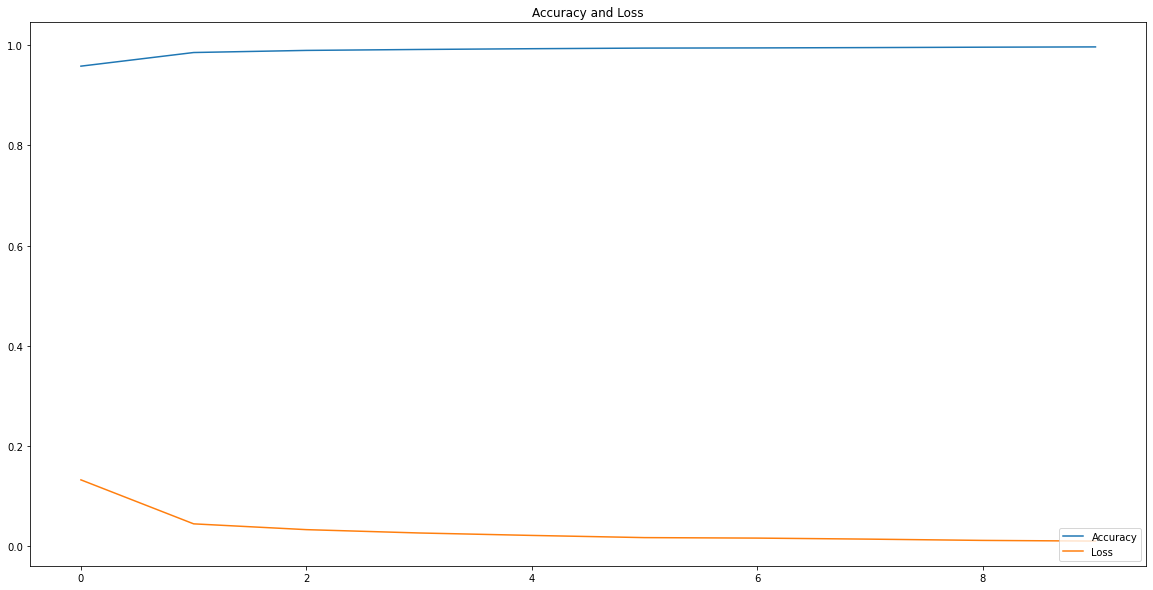

In [7]:
# checking the training accuracy and loss of the data

acc = history.history['accuracy']
loss = history.history['loss']
epochs_range = range(epochs)
plt.figure(figsize=(20,10))
plt.plot(epochs_range, acc, label='Accuracy')
plt.plot(epochs_range, loss, label='Loss')
plt.legend(loc='lower right')
plt.title('Accuracy and Loss')

ouput given by model : 0


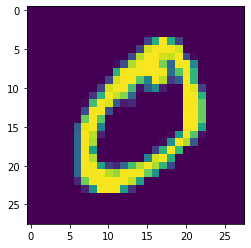

In [8]:
# output of model 
image = (train_images[1]).reshape(1,28,28,1)
predict_x=model.predict(image, verbose=0)
classes_x=np.argmax(predict_x,axis=1)
plt.imshow(image.reshape(28,28))
print('ouput given by model : {}'.format(classes_x[0]))

ouput given by model: 4


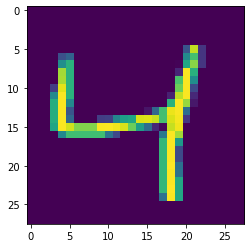

In [9]:
image = (train_images[2]).reshape(1,28,28,1)
predict_x=model.predict(image, verbose=0)
classes_x=np.argmax(predict_x,axis=1)
plt.imshow(image.reshape(28,28))
print('ouput given by model: {}'.format(classes_x[0]))

test images shape : (4, 28, 28)
digit predicted : 2
digit predicted : 1
digit predicted : 0
digit predicted : 4


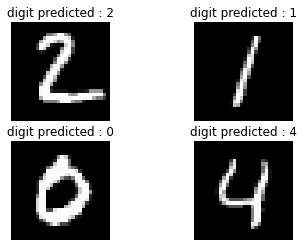

In [10]:
images = test_images[1:5]
images = images.reshape(images.shape[0], 28, 28)
print ("test images shape : {}".format(images.shape))


for i, test_image in enumerate(images, start=1):
    org_image = test_image
    test_image = test_image.reshape(1,28,28,1)
    predict_x=model.predict(test_image, verbose=0)
    classes_x=np.argmax(predict_x,axis=1)
    print ("digit predicted : {}".format(classes_x[0]))
    plt.subplot(220+i)
    plt.axis('off')
    plt.title("digit predicted : {}".format(classes_x[0]))
    plt.imshow(org_image, cmap=plt.get_cmap('gray'))

    

In [11]:
model.save("cnn-model-digitrecognition.h5")
print('model saved successfully..........')

model saved successfully..........


In [12]:
loaded_model = models.load_model("cnn-model-digitrecognition.h5")

ouput given by model : 4


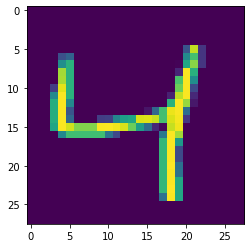

In [15]:
image = (train_images[2]).reshape(1,28,28,1)
model_pred = loaded_model.predict(image, verbose=0)
classes_x = np.argmax(model_pred,axis=1)
plt.imshow(image.reshape(28,28))
print('ouput given by model : {}'.format(classes_x[0]))